In [69]:
# Loading R packages
library(reshape)
library(ggplot2)
library(phyloseq)
library(plyr)
library(dplyr)
library(plotly)
library(wesanderson)

In [143]:
# Importing the dataset
ps = import_biom("../OTU_table/feature-table-metaD-tax.biom",parseFunction=parse_taxonomy_greengenes, "../OTU_table/Trees/fulltree.tre")

Warning message in strsplit(msg, "\n"):
“input string 1 is invalid in this locale”

In [144]:
ps

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 8979 taxa and 239 samples ]
sample_data() Sample Data:       [ 239 samples by 70 sample variables ]
tax_table()   Taxonomy Table:    [ 8979 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 8979 tips and 8976 internal nodes ]

In [145]:
colnames(sample_data(ps))

[1] "Al_mg_kg"                   "Barcodes"                  
 [3] "Burn_Severity_Index"        "Burned_Unburned"           
 [5] "CBI"                        "CEC_cmol_kg"               
 [7] "CFSI"                       "Ca_mg_kg"                  
 [9] "Clay_pct"                   "Community"                 
[11] "Cu_mg_kg"                   "Dead_Trees"                
[13] "EC_mS_cm"                   "Ecosite"                   
[15] "Fe_mg_kg"                   "Fire_ID"                   
[17] "Forest"                     "Fwd_Primer_Barcode"        
[19] "Interval"                   "K_mg_kg"                   
[21] "Land_Class"                 "Land_Class_Unburned"       
[23] "Live_Trees"                 "Mean_Duff_Depth_cm"        
[25] "Mg_mg_kg"                   "Mn_mg_kg"                  
[27] "Mo_mg_kg"                   "Moisture"                  
[29] "Moisture_Regime"            "Na_mg_kg"                  
[31] "Nutrient"                   "O_Depth_cm"                
[33] "Org_or_Min"                 "Overstory_CBI"             
[35] "P_mg_kg"                    "Pct_Exposed_Mineral"       
[37] "Plains"                     "Project_ID"                
[39] "RBR"                        "Replicate"                 
[41] "Rev_Primer_Barcode"         "Revcomp_Rev_Primer_Barcode"
[43] "S_mg_kg"                    "Sample_ID"                 
[45] "Sample_Name"                "Sand_pct"                  
[47] "Severity_Class"             "Silt_pct"                  
[49] "Site_ID"                    "TC_pct"                    
[51] "TIC_ash_pct"                "TOC_HCL_cruc_pct"          
[53] "TOC_LOI_pct"                "Total_N_pct"               
[55] "Total_S_pct"                "Understory_CBI"            
[57] "Veg_Comm"                   "Zn_mg_kg"                  
[59] "bui"                        "dc"                        
[61] "dmc"                        "ffmc"                      
[63] "fwi"                        "isi"                       
[65] "nTrees"                     "pH"                        
[67] "prec"                       "rh"                        
[69] "temp"                       "ws"

In [146]:
# Setting various parameters as combined values
sample_data(ps)$pH = as.numeric(sample_data(ps)$pH)
sample_data(ps)$Total_C_pct = as.numeric(sample_data(ps)$TC_pct)
sample_data(ps)$Total_N_pct = as.numeric(sample_data(ps)$Total_N_pct)
sample_data(ps)$Total_S_pct = as.numeric(sample_data(ps)$Total_S_pct)
sample_data(ps)$Burn_Severity_Index= as.numeric(sample_data(ps)$Burn_Severity_Index)
sample_data(ps)$CBI= as.numeric(sample_data(ps)$CBI)
sample_data(ps)$RBR= as.numeric(sample_data(ps)$RBR)
sample_data(ps)$CFSI= as.numeric(sample_data(ps)$CFSI)
sample_data(ps)$Mean_Duff_Depth_cm = as.numeric(sample_data(ps)$Mean_Duff_Depth_cm)
sample_data(ps)$Understory_CBI= as.numeric(sample_data(ps)$Understory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Overstory_CBI= as.numeric(sample_data(ps)$Overstory_CBI)
sample_data(ps)$Dead_Trees= as.numeric(sample_data(ps)$Dead_Trees)
sample_data(ps)$Pct_Exposed_Mineral= as.numeric(sample_data(ps)$Pct_Exposed_Mineral)
sample_data(ps)$dc = as.numeric(sample_data(ps)$dc)
sample_data(ps)$fwi = as.numeric(sample_data(ps)$fwi)
sample_data(ps)$dmc = as.numeric(sample_data(ps)$dmc)
sample_data(ps)$ffmc = as.numeric(sample_data(ps)$ffmc)
sample_data(ps)$TotalSeqs=sample_sums(ps)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”Warning message in eval(expr, envir, e

In [147]:
# Pulling out samples from this project only
ps.wb = prune_samples(sample_data(ps)$Project_ID=="WB15", ps)
ps.wb = prune_samples(sample_data(ps.wb)$Org_or_Min %in% c("O","M"), ps.wb)

In [148]:
# Merging lab replicates for analysis
ps.merged = merge_samples(ps.wb, "Sample_ID")

# This sums the OTUs for each sample ID, and averages the sample data
# That's an issue for the non-numeric sample data, so we have to add it back in.
# The code below is probably inefficient, but it works correctly.
names=colnames(sample_data(ps.wb))
notcommonnames = c('Sample_Name','Replicate','Project_ID','Fwd_Primer_Barcode','Rev_Primer_Barcode','Revcomp_Rev_Primer_Barcode')
commonnames = names[(names %in% notcommonnames)]
common_sample_data = sample_data(ps.wb)[ , -which(names(sample_data(ps.wb)) %in% commonnames)]
commonrownames=row.names(sample_data(ps.merged))
common_sample_data2 = common_sample_data[which(common_sample_data$Sample_ID %in% commonrownames),]
common_sample_data2 = common_sample_data2[!duplicated(common_sample_data2$Sample_ID), ]
row.names(common_sample_data2) = common_sample_data2$Sample_ID
sample_data(ps.merged)=common_sample_data2

Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMethod(object):
“NAs introduced by coercion”Warning message in asMeth

In [149]:
ps.merged.norm = transform_sample_counts(ps.merged, function(x) x / sum(x) )
ps = transform_sample_counts(ps, function(x) x / sum(x) )

In [150]:
colnames(sample_data(ps.merged.norm))

[1] "Al_mg_kg"            "Barcodes"            "Burn_Severity_Index"
 [4] "Burned_Unburned"     "CBI"                 "CEC_cmol_kg"        
 [7] "CFSI"                "Ca_mg_kg"            "Clay_pct"           
[10] "Community"           "Cu_mg_kg"            "Dead_Trees"         
[13] "EC_mS_cm"            "Ecosite"             "Fe_mg_kg"           
[16] "Fire_ID"             "Forest"              "Interval"           
[19] "K_mg_kg"             "Land_Class"          "Land_Class_Unburned"
[22] "Live_Trees"          "Mean_Duff_Depth_cm"  "Mg_mg_kg"           
[25] "Mn_mg_kg"            "Mo_mg_kg"            "Moisture"           
[28] "Moisture_Regime"     "Na_mg_kg"            "Nutrient"           
[31] "O_Depth_cm"          "Org_or_Min"          "Overstory_CBI"      
[34] "P_mg_kg"             "Pct_Exposed_Mineral" "Plains"             
[37] "RBR"                 "S_mg_kg"             "Sample_ID"          
[40] "Sand_pct"            "Severity_Class"      "Silt_pct"           
[43] "Site_ID"             "TC_pct"              "TIC_ash_pct"        
[46] "TOC_HCL_cruc_pct"    "TOC_LOI_pct"         "Total_N_pct"        
[49] "Total_S_pct"         "Understory_CBI"      "Veg_Comm"           
[52] "Zn_mg_kg"            "bui"                 "dc"                 
[55] "dmc"                 "ffmc"                "fwi"                
[58] "isi"                 "nTrees"              "pH"                 
[61] "prec"                "rh"                  "temp"               
[64] "ws"                  "Total_C_pct"         "TotalSeqs"

In [ ]:
df = psmelt(ps.merged)

In [ ]:
d = df %>%
    group_by(Sample_ID,TotalSeqs)%>%
    summarize()%>%
    arrange(-TotalSeqs)
d$Sample_ID = ordered(d$Sample_ID,levels=d$Sample_ID)
p = ggplot(d)
p = p + geom_bar(aes(x=Sample_ID, y=TotalSeqs), stat="identity")
p

## Ordination plots

In [151]:
minseqs = 1500
ps.merged.norm.min = prune_samples(sample_data(ps.merged.norm)$TotalSeqs>minseqs,ps.merged.norm)

In [162]:
ord = ordinate(ps.merged.norm.min, method = "PCoA", distance = "unifrac", weighted=TRUE)

Warning message in UniFrac(physeq, ...):
“Randomly assigning root as -- d74b2592ee9de030c324e73e8e965bf5 -- in the phylogenetic tree in the data you provided.”Warning message in matrix(tree$edge[order(tree$edge[, 1]), ][, 2], byrow = TRUE, :
“data length [17955] is not a sub-multiple or multiple of the number of rows [8978]”

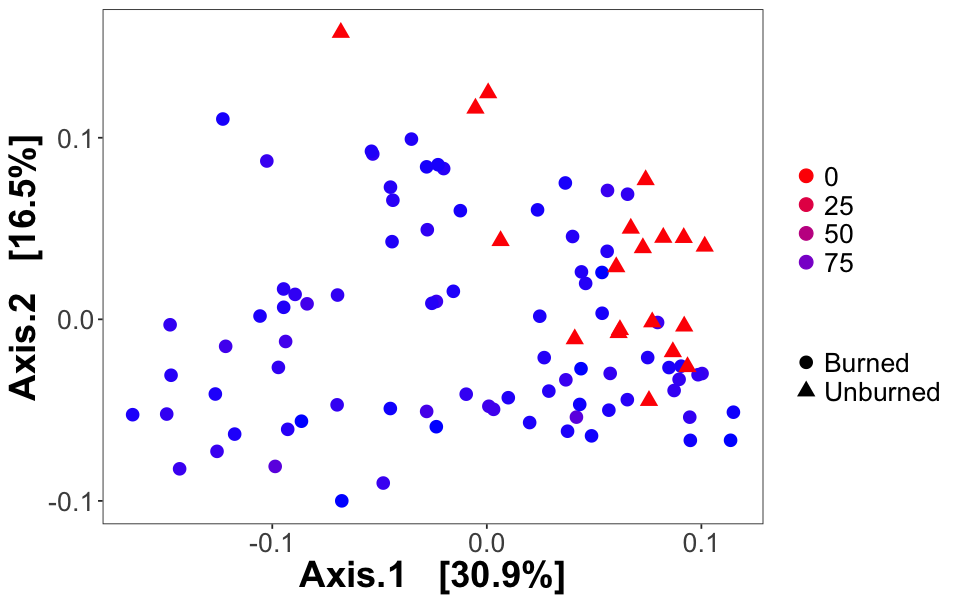

In [163]:
options(repr.plot.width=8, repr.plot.height=5)
p = plot_ordination(ps.merged.norm.min, ord, color = "ffmc", shape = "Burned_Unburned", axes=c(1,2))

p = p  + geom_point(size=3.5) + scale_colour_gradient(low="red",high="blue")

p = p + guides(colour = guide_legend(""), shape = guide_legend(""))

p = p + theme_bw() +
  theme(
      #legend.position = "right",
      #legend.justification=c(0,1),
      #legend.position=c(0.05,0.6),
      #legend.box.just= "left",
    plot.background = element_blank()
   ,panel.grid.major = element_blank()
   ,panel.grid.minor = element_blank()
    ,strip.text.x = element_text(size=14, face="bold"),
        axis.title = element_text(size=22, face="bold"),
        axis.text = element_text(size=16),
        legend.text = element_text(size=16),
        legend.title = element_text(size = 22),
        strip.background = element_rect(colour="white", fill="white"))

#p = p + facet_wrap(~Fire_ID)

p

## 3-D Ordination plots

In [14]:
ord = ordinate(ps.merged.norm.min, method = "NMDS", distance = "bray", weighted=TRUE, k=3, trymax=1000)
NMDS.coords = data.frame(ord$points)
# Extracting the coordinates from the ordination
NMDS.coords = merge(NMDS.coords,sample_data(ps.merged.norm.min), by = 0)
# Merging it with the sample data, by rowname (the same)
NMDS.coords = NMDS.coords %>%
    filter(Org_or_Min %in% c("O","M"))
plot_ly(NMDS.coords, x = NMDS.coords$MDS1, y = NMDS.coords$MDS2, z = NMDS.coords$MDS3, color = ~NMDS.coords$pH
        #, colors = c("red3","tan4","darkorange","skyblue3","chartreuse4")
        , symbol = NMDS.coords$Org_or_Min, symbols = 1:2
        #, alpha = 0.5
       )%>%
    layout(scene = list(xaxis = list(title = "NMDS1"), yaxis = list(title = "NMDS2"),
          zaxis = list(title = "NMDS3")))

Run 0 stress 0.1234209 
Run 1 stress 0.1235774 
... Procrustes: rmse 0.03684038  max resid 0.1792815 
Run 2 stress 0.1227333 
... New best solution
... Procrustes: rmse 0.01216364  max resid 0.08958964 
Run 3 stress 0.1236152 
Run 4 stress 0.1288774 
Run 5 stress 0.1238018 
Run 6 stress 0.1247516 
Run 7 stress 0.1257032 
Run 8 stress 0.1233084 
Run 9 stress 0.123487 
Run 10 stress 0.1238041 
Run 11 stress 0.123814 
Run 12 stress 0.1239324 
Run 13 stress 0.1239126 
Run 14 stress 0.1243386 
Run 15 stress 0.1279103 
Run 16 stress 0.1237539 
Run 17 stress 0.1242613 
Run 18 stress 0.1234031 
Run 19 stress 0.1238333 
Run 20 stress 0.1242107 
Run 21 stress 0.1256604 
Run 22 stress 0.1243365 
Run 23 stress 0.1237389 
Run 24 stress 0.124319 
Run 25 stress 0.1239075 
Run 26 stress 0.1293003 
Run 27 stress 0.1239064 
Run 28 stress 0.1240278 
Run 29 stress 0.1237354 
Run 30 stress 0.1236283 
Run 31 stress 0.1248826 
Run 32 stress 0.1238135 
Run 33 stress 0.1238014 
Run 34 stress 0.1242389 
Run 35 

No trace type specified:
  Based on info supplied, a 'scatter3d' trace seems appropriate.
  Read more about this trace type -> https://plot.ly/r/reference/#scatter3d
No scatter3d mode specifed:
  Setting the mode to markers
  Read more about this attribute -> https://plot.ly/r/reference/#scatter-mode


HTML widgets cannot be represented in plain text (need html)

## CCAs

In [59]:
ps.cca = prune_samples(!is.na(sample_data(ps.merged.norm.min)$pH), ps.merged.norm.min)

In [79]:
MyOrd = ordinate(ps.cca,"CCA","bray", formula=~CBI+pH)

Warning message:
“Ignoring unknown aesthetics: shape, label”Warning message:
“Ignoring unknown aesthetics: shape”

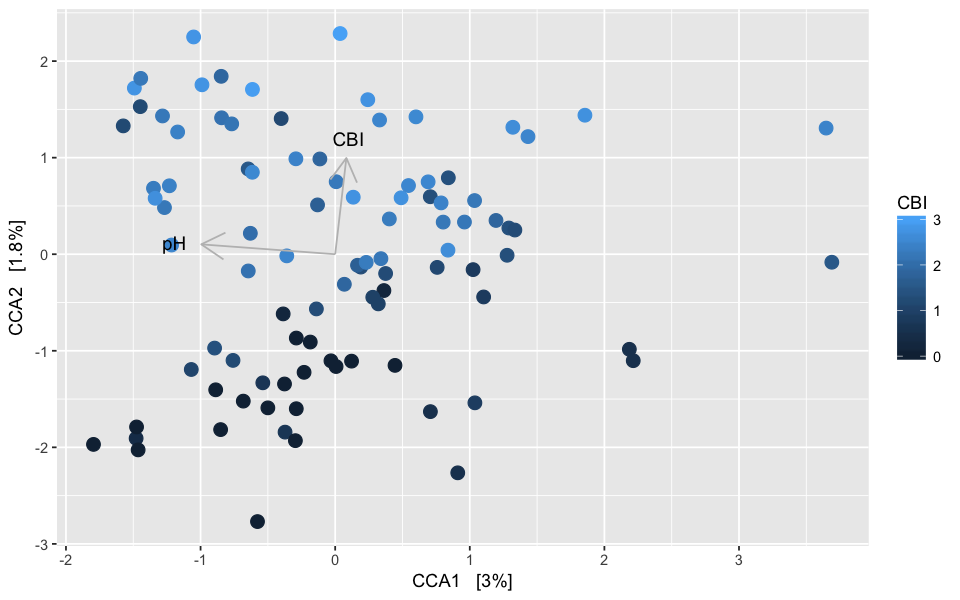

In [80]:
#Palette = c(wes_palette("Darjeeling"),wes_palette("Darjeeling2"))
#Palette = Palette[c(2,4,5,1,8,3,7,6,9)]
p0 = plot_ordination(ps.cca,MyOrd,type="samples",color="CBI") + geom_point(size=3.5) #+ scale_color_manual(values=Palette)
    #+ geom_text(aes(label=POSname, size=14),hjust=-3)
    
arrowmat = vegan::scores(MyOrd, display = "bp")
# Add labels, make a data.frame
arrowdf <- data.frame(labels = rownames(arrowmat), arrowmat)
# Define the arrow aesthetic mapping
arrow_map = aes(xend = CCA1, yend = CCA2, x = 0, y = 0, shape = NULL, color = NULL, 
    label = labels)
label_map = aes(x = 1.2 * CCA1, y = 1.2 * CCA2, shape = NULL, color = NULL, 
    label = labels)
# Make a new graphic
arrowhead = arrow(length = unit(0.05, "npc"))
p1 = p0 + geom_segment(arrow_map, size = 0.5, data = arrowdf, color = "gray", 
    arrow = arrowhead) + geom_text(label_map, size = 4, data = arrowdf)
p1

## Holden et al. paper plots

In [86]:
d = psmelt(ps.merged.norm.min)

In [87]:
df = d %>%
    group_by(Sample,Phylum,CBI,RBR)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)%>%
    group_by(Phylum)%>%
    summarize(MeanCBI=mean(CBI),MeanRBR=mean(RBR))
df

Phylum,MeanCBI,MeanRBR
[Caldithrix],0.5200000,-5.975622
[Thermi],1.3300000,163.903909
AC1,0.5200000,-5.975622
Acidobacteria,1.4724242,285.573761
Actinobacteria,1.4697000,284.995184
AD3,1.7838710,352.779181
Armatimonadetes,1.5536486,303.091018
Bacteroidetes,1.4845455,288.013384
BHI80-139,1.5580000,271.796830
BRC1,1.8566667,373.879236


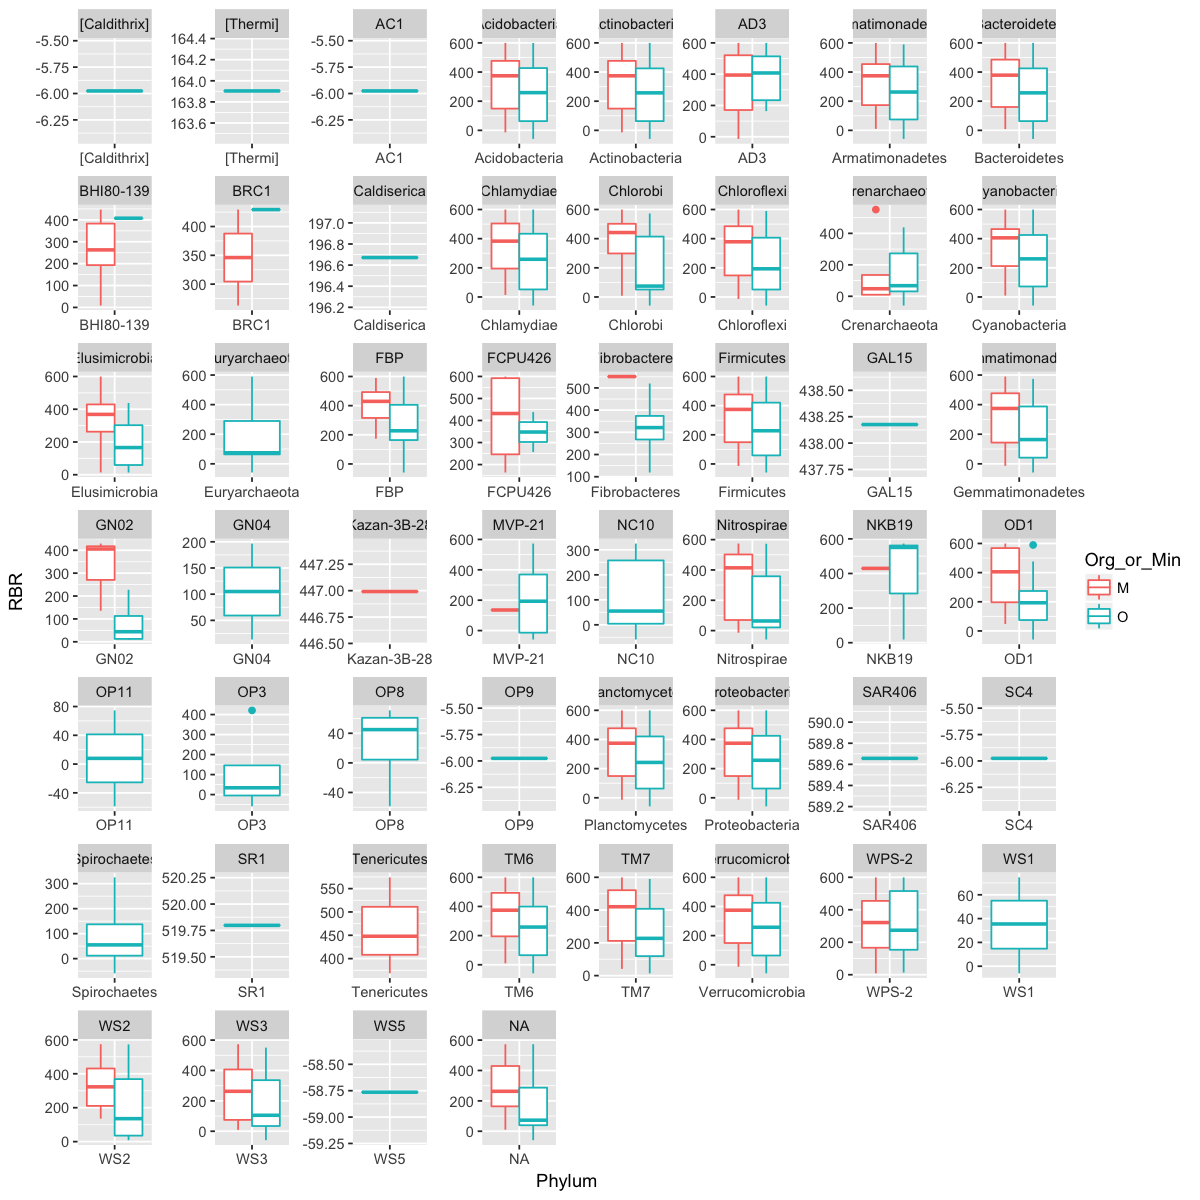

In [91]:
options(repr.plot.width=10, repr.plot.height=10)
df = d %>%
    group_by(Sample,Phylum,CBI,RBR,Org_or_Min)%>%
    summarize(TaxPresent = ifelse(sum(Abundance)>0,1,0))%>%
    filter(TaxPresent>0)

p = ggplot(df, aes(x=Phylum, color=Org_or_Min+Burned_Unburned)) + geom_boxplot(aes(y=RBR)) + facet_wrap(~Phylum, scales="free")
p